In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
import seaborn as sns
from scipy.stats import f

# Data Preprocessing

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
cols_with_missing = pd.Series(['math score','reading score','writing score'])

In [5]:
num_missing = (df[cols_with_missing]==0).sum()
print(num_missing)

math score       0
reading score    0
writing score    0
dtype: int64


In [6]:
df[cols_with_missing] = df[cols_with_missing].replace(0,np.nan)

In [7]:
df = df.dropna()

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Encoding Categorical Data

In [9]:
numeric_columns = ['math score','reading score','writing score']

# Encoding the Independent Variable

In [10]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [11]:
# Mapping the level of the parent's education from 1-6 respectively
edu_mapping = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

In [12]:
# Changing the level of parent's education to a number
df['parental level of education'] = df['parental level of education'].map(edu_mapping)

In [13]:
df["test preparation course"]=np.where(df["test preparation course"].str.contains("none"),0,1)

In [14]:
#Changing the lunch into 1,0
# 0 - standard
# 1 - free/reduces
df["lunch"] = np.where(df["lunch"].str.contains("standard"),0,1)

In [15]:
categorical_columns = ["gender","race/ethnicity","lunch","test preparation course"]

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,2,0,1,67,67,63
1,female,group D,1,1,0,40,59,55
2,male,group E,3,1,0,59,60,50
3,male,group B,2,0,0,77,78,68
4,male,group E,4,0,1,78,73,68


# Encoding the Dependent Variables

In [17]:
df['math score'].unique()

array([ 67,  40,  59,  77,  78,  63,  62,  93,  47,  99,  80,  74,  81,
        69,  58,  54,  23,  39,  83,  71,  44,  46,  51,  53,  33,  87,
        65,  79,  68,  57,  98, 100,  60,  64,  52,  36,  56,  88,  42,
        76,  49,  72,  31,  32,  97,  94,  95,  45,  75,  66,  70,  82,
        92,  30,  41,  43,  55,  73,  48,  86,  84,  50,  89,  91,  85,
        61,  35,  90,  96,  13,  38,  28,  26,  37,  29,  34,  25],
      dtype=int64)

# Split into training and testing sets

In [18]:
X = df[categorical_columns]
y= df[['math score']]

In [19]:
trainX,testX,trainy,testy=train_test_split(X,y,test_size=.2,random_state=42)

# Feature Scaling

## Standardization

In [20]:
original = df[numeric_columns]
standardizedArray = preprocessing.scale(original)
standardized = pd.DataFrame(standardizedArray, columns=numeric_columns)

In [21]:
standardized

,math score,reading score,writing score
0,0.039233,-0.135914,-0.303851
1,-1.714564,-0.679027,-0.816895
2,-0.480410,-0.611138,-1.137548
3,0.688788,0.610866,0.016802
4,0.753743,0.271421,0.016802
...,...,...,...
995,0.428966,0.067753,-0.175590
996,1.208431,1.493425,1.555936
997,-2.234208,-2.308366,-1.714724
998,0.428966,0.339310,0.914630


# Applying Regression

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,2,0,1,67,67,63
1,female,group D,1,1,0,40,59,55
2,male,group E,3,1,0,59,60,50
3,male,group B,2,0,0,77,78,68
4,male,group E,4,0,1,78,73,68


## Making a numeric data frame with only relevant information

In [23]:
num_df = df.select_dtypes(include=['int32','int64','float64'])
num_df.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,0,1,67,67,63
1,1,1,0,40,59,55
2,3,1,0,59,60,50
3,2,0,0,77,78,68
4,4,0,1,78,73,68


In [24]:
def edu_level_heat(edu_level,title):
    edu_df = num_df[num_df['parental level of education']==edu_level].copy(deep=True)
    edu_df = edu_df.drop(columns=['parental level of education'])
    corr=edu_df.corr()
    sns.set(font_scale=1)
    plt.figure(figsize=(4,4))
    sns.heatmap(
        corr,        
        cmap='RdBu_r', 
        annot=True, 
        vmin=-1, vmax=1);
    plt.title(title)
    return corr

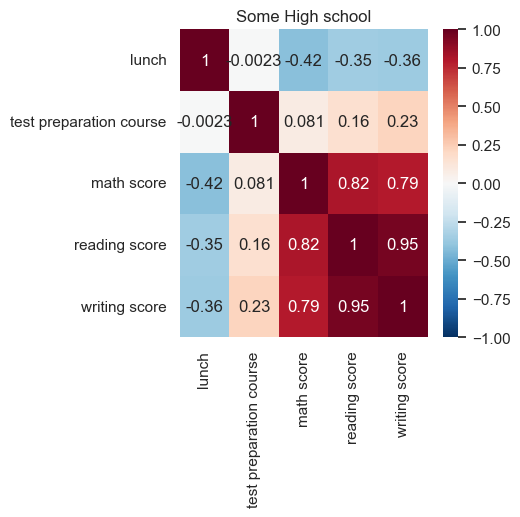

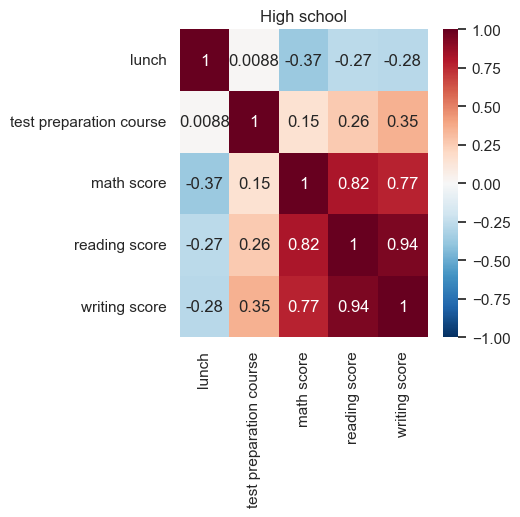

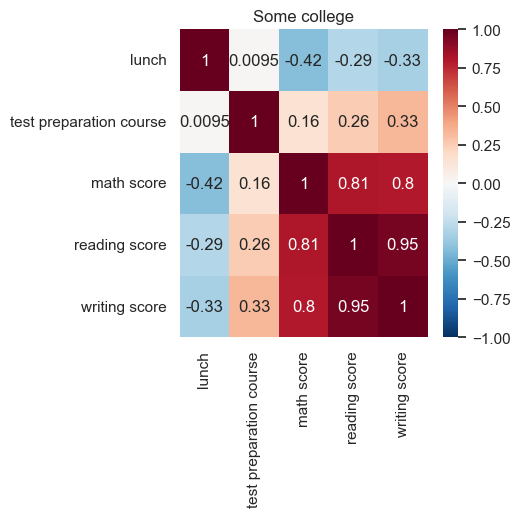

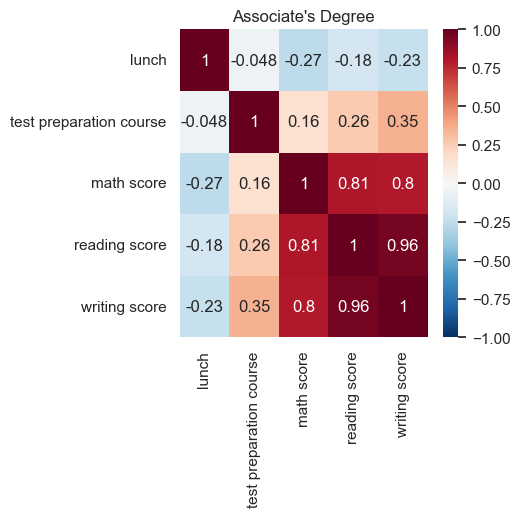

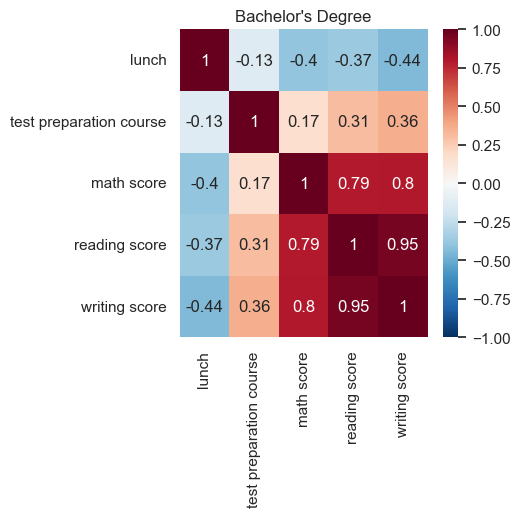

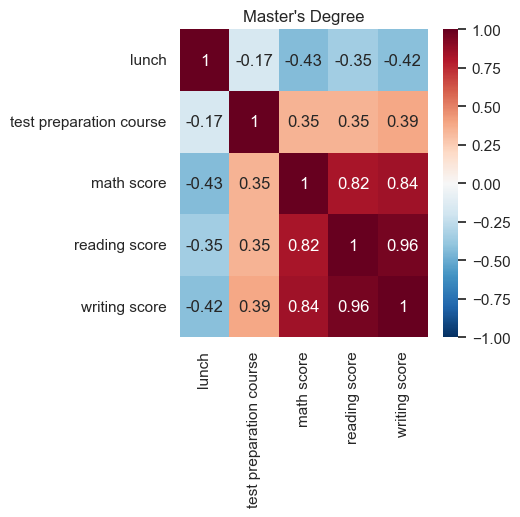

In [25]:
for i in range(1,7):
    title = ''
    if i == 1:
        title = 'Some High school'
    elif i == 2:
        title = 'High school'
    elif i == 3:
        title = 'Some college'
    elif i == 4:
        title = "Associate's Degree"
    elif i == 5:
        title = "Bachelor's Degree"
    elif i == 6:
        title = "Master's Degree"        
    edu_level_heat(i, title)

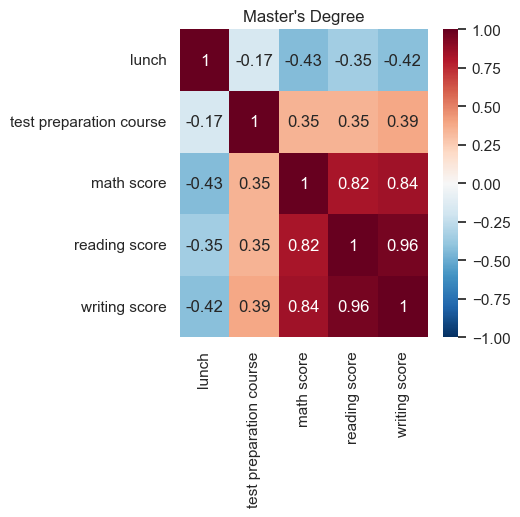

In [26]:
# Making a heat correlation map for parent's with master's degree
# checking correlation of variables
master_corr = edu_level_heat(6,"Master's Degree")

In [27]:
# Isolating the math score correlation from the test scores of students with
#parents with masters
abs_corr = master_corr['math score'].apply(lambda x: abs(x))
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr.drop(index='math score', axis=1, inplace=True)
abs_corr.head()

writing score              0.844101
reading score              0.824118
lunch                      0.431505
test preparation course    0.351065
Name: math score, dtype: float64

In [28]:
def do_regression(X_train, X_test, y_train, y_test):
    # Fit a least squares regression model
    linModel = LinearRegression()
    linModel.fit(X_train, y_train)
    yPredicted = linModel.predict(X_train)
    print('coefficients: ', linModel.coef_)
    training_r = linModel.score(X_train,y_train)
    testing_r = linModel.score(X_test, y_test)
    print('Training r_squared value: ',training_r)
    print('Testing r_squared value: ', testing_r)
    # Compute the sum of squared errors for the least squares model
    SSEreg = sum((y_train - yPredicted) ** 2)   #[0]
    print('SSE of Regression: ', SSEreg)
    # Compute the sum of squared errors for the horizontal line model
    SSEyBar = sum((y_train - np.mean(y_train)) ** 2)  #[0]
    print('SSE of mean: ', SSEyBar)
    dfn = 1.0                            # the y-intercept
    dfd = y_train.shape[0] - len(columns) + 1
    F_stat = ((SSEyBar - SSEreg) / (dfn) / (SSEreg / dfd ))
    print('F statistic: ', F_stat)
    p_value = 1 -f.cdf(F_stat, dfn, dfd)
    print('p-value: ', p_value, '\n')
    return p_value, linModel.score(X_train,y_train), linModel.score(X_test, y_test)

In [29]:
y= df[['math score']].values.reshape(-1,1)
columns = []
training = []
testing = []
SL = 0.05
for i in range(len(abs_corr)):
    columns.append(abs_corr.index[i])
    print(columns)
    features = df[columns]
    X = features.values.reshape(-1, len(columns))
    X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=.2, random_state=42)
    p_value, training_r, testing_r = do_regression(X_train, X_test, y_train, y_test)
    training.append(training_r)
    testing.append(testing_r)
    if p_value > SL:
        break

['writing score']
coefficients:  [0.80614879]
Training r_squared value:  0.6504054613091017
Testing r_squared value:  0.6442938659535803
SSE of Regression:  66451.26159218459
SSE of mean:  190080.94875000019
F statistic:  1488.3652673628799
p-value:  1.1102230246251565e-16 

['writing score', 'reading score']
coefficients:  [0.27533252 0.58865193]
Training r_squared value:  0.6786039784865969
Testing r_squared value:  0.6729880534902943
SSE of Regression:  61091.26069374304
SSE of mean:  190080.94875000019
F statistic:  1687.029529045308
p-value:  1.1102230246251565e-16 

['writing score', 'reading score', 'lunch']
coefficients:  [ 0.19959051  0.6238714  -4.48713204]
Training r_squared value:  0.6960312420102452
Testing r_squared value:  0.6927302405031308
SSE of Regression:  57778.66990905166
SSE of mean:  190080.94875000019
F statistic:  1827.2697983747998
p-value:  1.1102230246251565e-16 

['writing score', 'reading score', 'lunch', 'test preparation course']
coefficients:  [ 0.2658

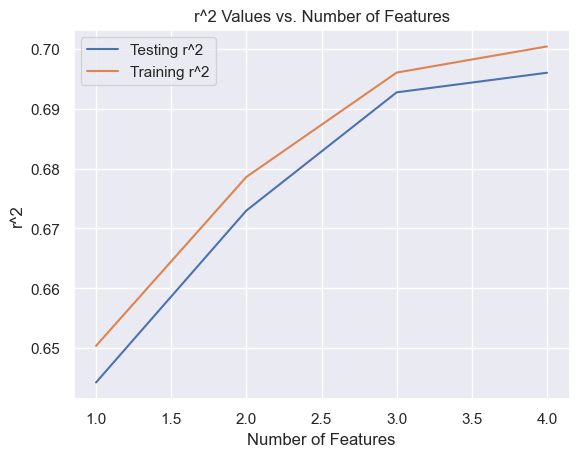

In [30]:
x_values = list(range(1,len(testing)+1))
plt.plot(x_values,testing, label="Testing r^2")
plt.plot(x_values,training, label = "Training r^2")
plt.title('r^2 Values vs. Number of Features')
plt.legend()
plt.xlabel('Number of Features')
plt.ylabel('r^2')
plt.show()